In [3]:
import sys

sys.path.append("../../")

from utils import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import json

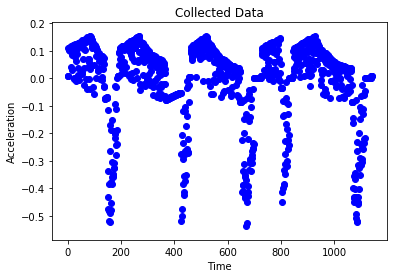

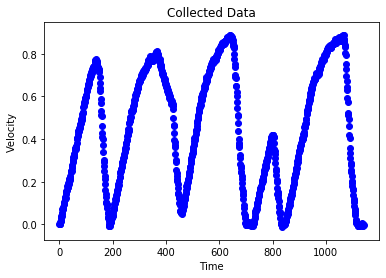

In [4]:
data_points = json.load(open("complex_data_points.json", "r"))

inps = []
outs = []
times = []

for t, (ped, amt, vel, acc) in enumerate(data_points):
    
    if (ped == 'accelerator'):
        inp = [amt, 0, vel]
    elif (ped == 'brake'):
        inp = [0, amt, vel]
    elif (ped == None):
        inp = [0, 0, vel]

    inps.append(inp)
    outs.append(acc)
    times.append(t)

plt.title("Collected Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(times, outs, color = 'b')
plt.show()

plt.title("Collected Data")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.scatter(times, [vel for (_, _, vel) in inps], color = 'b')
plt.show()

Model Fit 0.7746711905874477
Model Predictions:
Accelerator Weight: 0.18618795457913695
Brake Weight: -0.38148246444436706
Friction Constant: -0.1426301446893542
Rolling Bias: 0.041955292195693605
WITHIN 0.02 421/1143 times
MEDIAN ERROR 0.0305


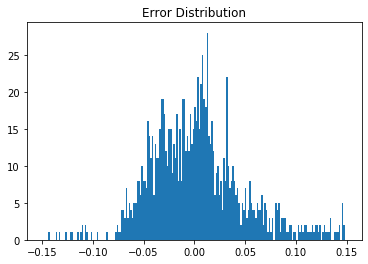

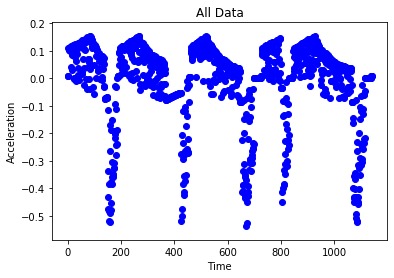

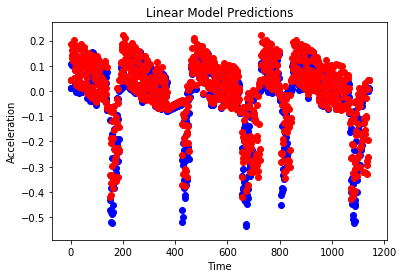

In [5]:
model = LinearRegression()

model.fit(inps, outs)
fit_score = model.score(inps, outs)
(acc_w, brake_w, f_c), r_b = model.coef_, model.intercept_

print(f"Model Fit {fit_score}")
print(f"Model Predictions:")
print(f"Accelerator Weight: {acc_w}")
print(f"Brake Weight: {brake_w}")
print(f"Friction Constant: {f_c}")
print(f"Rolling Bias: {r_b}")

correct = 0
tol = 0.02
errors = []

preds = model.predict(inps)
for i, (prediction, target) in enumerate(zip(preds, outs)):
    print(f"EVALUATING {i + 1}/{len(inps)}", end = "\r")
    
    if (abs(prediction - target) < tol):
        correct += 1
    errors.append(prediction - target)
    
print(f"WITHIN {tol} {correct}/{len(inps)} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("Error Distribution")
plt.hist(errors, bins = 200, range = (-0.15, 0.15))
plt.show()

plt.title("All Data")
plt.scatter(times, outs, color = 'b')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()


plt.clf()
plt.title("Linear Model Predictions")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(times, outs, color = 'b')
plt.scatter(times, preds, color = 'r')
plt.show()

In [6]:
model = nn.fcn(model_name = "../../car_iface/complex_accel", num_inputs = 3)

In [11]:
model.train(input_data = inps, targets = outs, num_epochs = 100)

EPOCH 1 0.000776
EPOCH 21 0.000792
EPOCH 41 0.000621
EPOCH 61 0.000648
EPOCH 81 0.000681


WITHIN 0.02 917/1143 times
MEDIAN ERROR 0.0083


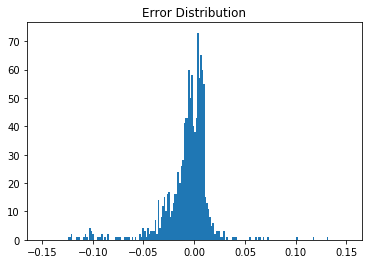

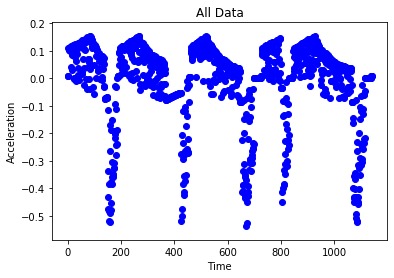

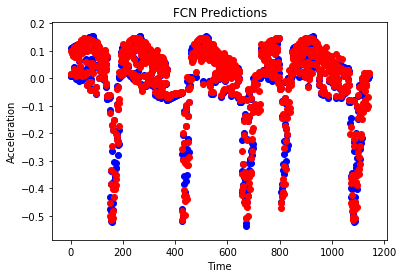

In [12]:
correct = 0
tol = 0.02
errors = []

preds = model(inps).detach().numpy()
for i, (prediction, target) in enumerate(zip(preds, outs)):
    print(f"EVALUATING {i + 1}/{len(inps)}", end = "\r")
    
    if (abs(prediction - target) < tol):
        correct += 1
    errors.append(prediction - target)
    
print(f"WITHIN {tol} {correct}/{len(inps)} times")
print(f"MEDIAN ERROR {np.median(np.abs(errors)):.4f}")

plt.title("Error Distribution")
plt.hist(errors, bins = 200, range = (-0.15, 0.15))
plt.show()

plt.title("All Data")
plt.scatter(times, outs, color = 'b')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()


plt.clf()
plt.title("FCN Predictions")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(times, outs, color = 'b')
plt.scatter(times, preds, color = 'r')
plt.show()